**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - Data Checkpoint

# Names

- Adomas Vaitkus
- Amber Tang
- Johanna Phan
- Annalise Ahn

# Research Question

How do certain factors such as breed, age, size, sex, etc. influence the liklihood of a dog being brought into a shelter in the US?



## Background and Prior Work


Every year, millions of dogs of all shapes and sizes are brought into rescue shelters across the US. These shelters are becoming increasingly overwhelmed by abandoned dogs: In 2023, there were 250,000 more animals in the shelter system than the year before.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) By analyzing what influences a dog’s likelihood of being brought into a shelter, we hope to identify key factors that contribute to this rise in abandoned dogs. By understanding trends like breed, age, size, and behavioral traits that may impact surrender rates, we can help to decrease shelter intake rates and increase the chances of finding each dog a stable, loving home.

Out of the 3.1 million dogs that enter adoption centers every year, about 2 million are adopted, and about 920k end up euthanized. According to these statistics, dogs in adoption facilities have approximately a 2/3 chance of being adopted each year and a 1/3 chance of being euthanized.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) By analyzing these statistics, we aim to understand how to improve these numbers.

Only 23% of dogs taken in by families and individuals come from animal shelters. It is also estimated that 75% of the pets that were surrendered for adoption were because of disobedience, barking, hyperactivity, and aggression.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) Some physical traits of dogs least likely to be adopted from shelters include black dogs, senior dogs, and dogs with health problems. Mental traits of unlikely adoptees include having behavior problems and being a bonded pair with another dog.<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4)

A previous study looks into patterns of genetic heritage found among shelter dogs at two animal shelters in Phoenix, Arizona and San Diego, California. There were 125 distinct breeds, but only 4.9% were purebred. This suggests mixed breeds are more likely to be brought to shelters. The study also found that the most common dog breeds in shelters were American Staffordshire Terriers, Chihuahuas, and Poodles. Additionally, it took significantly longer for dogs with pitbull-type ancestries to get adopted.<a name="cite_ref-5"></a>[<sup>5</sup>](#cite_note-5)

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Gibson, K. (2024, January 9). Animal shelters are overwhelmed by abandoned dogs. Here’s why. CBS News. https://www.cbsnews.com/news/animal-shelters-overwhelmed-by-abandoned-dogs/ 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Pet statistics. (n.d.). ASPCA. https://www.aspca.org/helping-people-pets/shelter-intake-and-surrender/pet-statistics 
3. <a name="cite_note-3"></a> [^](#cite_ref-3) Rainwalk. (2024, October 22). Pet adoption statistics 2022. Rainwalk Pet Insurance. https://rainwalkpetinsurance.com/pet-adoption-statistics-2022/#:~:text=Some%20of%20the%20reasons%20why%20these%20end,among%20all%20dog%20breeds%2C%20Pit%20Bulls%20& 
4. <a name="cite_note-4"></a> [^](#cite_ref-4) Johnstone, G. (2022, July 19). These dogs are the last to be adopted. The Spruce Pets. https://www.thesprucepets.com/last-dogs-to-be-adopted-4586942 
5. <a name="cite_note-5"></a> [^](#cite_ref-5) Gunter, L. M., Barber, R. T., & Wynne, C. D. L. (2018). A canine identity crisis: Genetic breed heritage testing of shelter dogs. PLoS ONE, 13(8), e0202633. https://doi.org/10.1371/journal.pone.0202633 


# Hypothesis


We predict a strong positive correlation between a dog's behavioral factors and its liklihood of being brought into a shelter. This is because we believe owners tend to care more about the temperament of a dog than its physical appearance. Specific behavioral factors in family settings would include being house trained and being good with children, and any special needs. We predict the lowest correlation to be with sex, age, and color of the dog for the same reason.

# Data Overview

- Original Dataset Name: allDogDescriptions
- Link to the dataset: https://www.kaggle.com/datasets/whenamancodes/dog-adoption?select=allDogDescriptions.csv
- Number of observations: 58,200
- Number of variables: 35

This dataset is a csv file containing information about adoptable dogs found on petfinder.com. It includes information on where the dog is located, breed, color, age, sex, size, coat, health status, and behavioral traits.
The health variables (fixed, special_needs) and behavior variables (house_trained, shots_current, env_children, env_dogs, env_cats) are all boolean types, while the rest are string type categorical variables.

## FinalDogDescriptions Dataset

Some of the variables in the original dataset are redundant such as the species column and country column, since the values are all 'dog' and 'USA' respectively. We chose to remove these columns and others like them. We also decided to remove rows that were missing data in the breed, primary color, and behavior/health columns. Finally, we replaced the remaining null values with a string 'None'.

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(context = 'talk', style = 'white')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [ ]:
# read in original dataset
df = pd.read_csv("C:\\Users\\amber\\Downloads\\OriginalAllDogDescriptions.csv (1)\\allDogDescriptions.csv")

# drop unnecesary columns
columns_to_drop = ['id', 'org_id', 'url', 'type.x', 'declawed', 'status', 'type.y','index', 'species', 'accessed', 'stateQ', 'contact_country', 'breed_unknown', 'accessed', 'description', 'posted']
df.drop(columns_to_drop, inplace=True, axis=1)

# drop aforementioned rows with missing data
rows_to_drop = ['color_primary', 'age', 'size', 'coat', 'fixed', 'house_trained', 'special_needs', 'shots_current', 'env_children', 'env_dogs', 'env_cats']
df.dropna(subset=rows_to_drop, inplace=True)

# replace remaining null values with 'None'
df = df.replace(np.NaN, 'None')

# saves newly wrangled dataset as a csv file
df.to_csv("C:\\Users\\amber\\Downloads\\OriginalAllDogDescriptions.csv\\OriginalAllDogDescriptions.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amber\\Downloads\\OriginalAllDogDescriptions.csv (1)\\allDogDescriptions.csv'

# Results

We read in our newly cleaned dataset and took a first look at the data.

In [33]:
#import cleaned file from github
dogs = pd.read_csv('FinalDogDescriptions')
dogs = dogs.drop(columns = ["Unnamed: 0"])

#look at table
dogs

breed_primary           breed_secondary  breed_mixed  \
0                    Chihuahua                      None         True   
1         Jack Russell Terrier                      None         True   
2                Irish Terrier                      None        False   
3            Yorkshire Terrier                      None        False   
4                Cairn Terrier                      None        False   
...                        ...                       ...          ...   
6694  Black Labrador Retriever                  Shar-Pei         True   
6695             Border Collie  Black Labrador Retriever         True   
6696        Labrador Retriever          Pit Bull Terrier         True   
6697        Labrador Retriever                  Shar-Pei         True   
6698        Labrador Retriever                     Hound         True   

                         color_primary              color_secondary  \
0                        White / Cream                         None   
1     Tricolor (Brown, Black, & White)                         None   
2              Red / Chestnut / Orange                White / Cream   
3                 Gray / Blue / Silver  Yellow / Tan / Blond / Fawn   
4                                Black                White / Cream   
...                                ...                          ...   
6694                             Black                White / Cream   
6695                             Black                White / Cream   
6696                             Black  Yellow / Tan / Blond / Fawn   
6697                            Golden                         None   
6698                 Brown / Chocolate                White / Cream   

     color_tertiary     age     sex    size    coat  ...  house_trained  \
0              None   Young  Female   Small   Short  ...           True   
1              None   Young    Male   Small   Short  ...          False   
2              None   Adult    Male   Small   Short  ...          False   
3              None  Senior    Male   Small  Medium  ...          False   
4              None   Adult  Female   Small   Short  ...          False   
...             ...     ...     ...     ...     ...  ...            ...   
6694           None   Adult  Female  Medium   Short  ...          False   
6695           None   Adult    Male  Medium  Medium  ...          False   
6696           None   Adult    Male  Medium   Short  ...          False   
6697           None   Adult    Male  Medium   Short  ...          False   
6698           None   Adult  Female  Medium   Short  ...          False   

      special_needs  shots_current  env_children  env_dogs  env_cats  \
0             False           True          True      True      True   
1             False           True          True      True     False   
2             False           True          True      True      True   
3             False           True          True      True      True   
4             False           True          True      True      True   
...             ...            ...           ...       ...       ...   
6694          False           True          True      True      True   
6695          False           True          True      True     False   
6696          False           True          True      True     False   
6697          False           True          True     False     False   
6698          False           True         False     False     False   

          name contact_city contact_state contact_zip  
0        Frost    Henderson            NV       89009  
1           TD      Pahrump            NV       89048  
2       Mohave      Pahrump            NV       89048  
3     Maverick      Pahrump            NV       89048  
4        Daisy      Pahrump            NV       89048  
...        ...          ...           ...         ...  
6694    Mandie      Worland            WY       82401  
6695      Joey      Worland            WY       82401  
6696       Sam   

## Basic Physical Attributes

First, we looked at the basic physical attributes (age, sex, size, and coat) to see the distributions among the dogs up for adoption.

In [7]:
age = dogs["age"]
age_count = age.value_counts()
age_count

Adult     2816
Baby      1820
Young     1541
Senior     522
Name: age, dtype: int64

In [8]:
sex = dogs["sex"]
sex_count = sex.value_counts()
sex_count

Male      3372
Female    3327
Name: sex, dtype: int64

In [9]:
size = dogs["size"]
size_count = size.value_counts()
size_count

Medium         3504
Large          1744
Small          1295
Extra Large     156
Name: size, dtype: int64

In [10]:
coat = dogs["coat"]
coat_count = coat.value_counts()
coat_count

Short       4939
Medium      1332
Long         324
Wire          58
Curly         38
Hairless       8
Name: coat, dtype: int64

### Graphs

Then, we created graphs to visualize the distributions of the variables and compared them to the overall US dog population.

#### Age

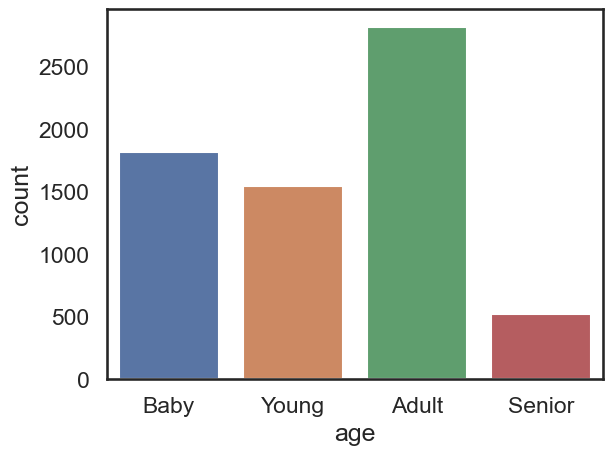

In [11]:
# age bar graph
age_plot = sns.countplot(data=dogs, x=age, order=['Baby', 'Young', 'Adult', 'Senior'])

The graph above shows that there are the most Adult dogs in shelters and the fewest Senior dogs.
According to MRI-Simmons data, 52% of dog-owning households in the US owned a Senior dog in 2022. On the other hand, only 9% owned a Puppy under one year old.<a name="cite_ref-6"></a>[<sup>6</sup>](#cite_note-6) When we compare this to the above distribution of ages, it is clear that the population of dogs in shelters is much younger on average than the overall dog population.

‌

#### Sex

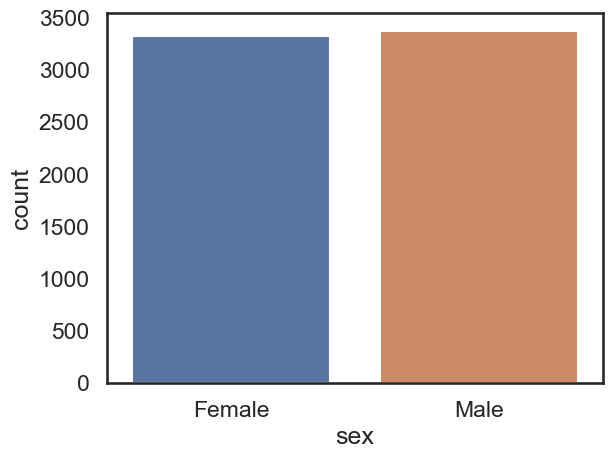

In [12]:
# sex bar graph
sex_plot = sns.countplot(data=dogs, x=sex)

In [28]:
chi2_stat, p_value = stats.chisquare(sex_count)
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_value)

Chi-squared statistic: 0.30228392297357815
P-value: 0.5824541363586802


The graph above shows a very small difference between Male and Female dogs. To be sure of this, we do a Chi-squared test.
The p-value of the chi-squared test above is about 0.5, suggesting that the difference between the number of Male and Female dogs in the dataset is purely due to chance. We can conclude that there is likely no correlation between a dog's sex and its likelihood of being put in a shelter.

#### Size

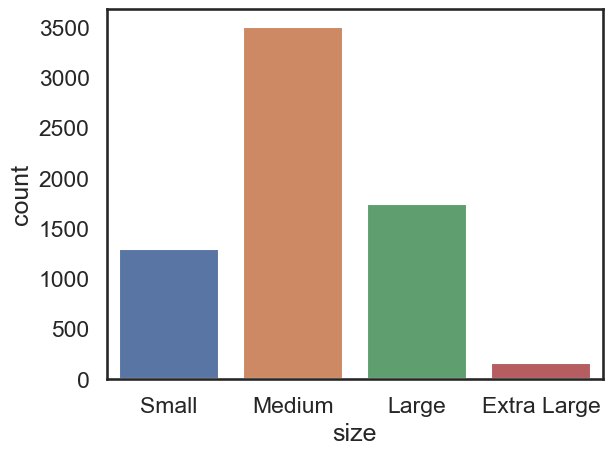

In [14]:
# size bar graph
size_plot = sns.countplot(data=dogs, x=size, order=['Small', 'Medium', 'Large', 'Extra Large'])

The graph above shows that there are the most Medium-sized dogs in shelters, and the least Small and Extra-Large dogs.
According to the 2021-2022 APPA Survey, 47% of dog-owning households own a Small dog, 31% own a Medium dog, and 36% own a Large dog.<a name="cite_ref-7"></a>[<sup>7</sup>](#cite_note-7) We were not able to find any reliable data on 'Extra Large' dogs, as they were grouped in with 'Large' dogs. When comparing this to the distribution shown above, the number of Medium dogs is disproportionally high, while the number of Small dogs is disproportionally low.

#### Coat

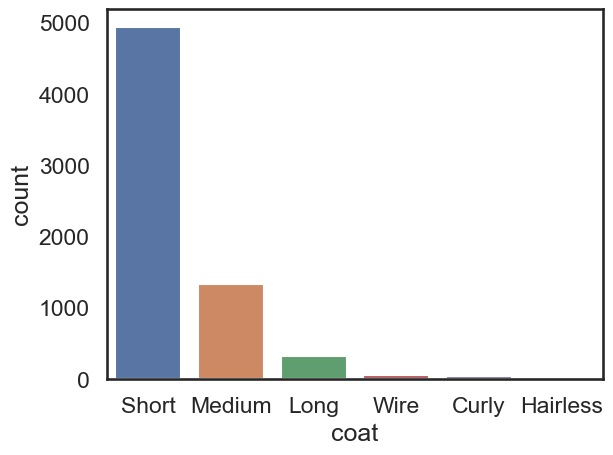

In [15]:
# coat bar graph
coat_plot = sns.countplot(data=dogs, x=coat, order=['Short', 'Medium', 'Long', 'Wire', 'Curly', 'Hairless'])

According to the graph above, there are the most Short-haired dogs in shelters, followed by Medium, then Long, then Hairless. Because Wire and Curly are hair *textures* and not lengths, we will not take them into account.
We could not find any exact data on the distribution of coat lengths in the general dog population. However, the short category does seem to be disproportionally high compared to the dogs that we see every day. A possible explanation for this is the prevalence in shelters of certain breeds that happen to have short hair, like pitbull terriers and labrador retreivers. We will discuss the breeds in more detail later in our analysis.

6. <a name="cite_note-6"></a> [^](#cite_ref-6) “Seniors” are a growing part of the pet population. (2023, December 7). GlobalPETS. https://globalpetindustry.com/article/seniors-are-growing-part-pet-population/
7. <a name="cite_note-7"></a> [^](#cite_ref-7) The Humane Society of The United States. (2021). Pets by the numbers. HumanePro. https://humanepro.org/page/pets-by-the-numbers


## Behavioral/Health Traits

After this we considered the 7 columns with boolean data (TRUE/FALSE), both individually and collectively. These variables are related since they are all related to behavior and health. We expected each of these to give the dogs a better chance of being admitted into the shelter, with the exception of special_needs which has the reverse effect. We will therefore consider 'False' as a positive value and 'True' as a zero value for this case only.

In [16]:
fixed = dogs["fixed"]
fixed.value_counts()

True     5800
False     899
Name: fixed, dtype: int64

In [17]:
house_trained = dogs["house_trained"]
house_trained.value_counts()

True     3958
False    2741
Name: house_trained, dtype: int64

In [18]:
special_needs = dogs["special_needs"]
special_needs.value_counts()

False    6273
True      426
Name: special_needs, dtype: int64

In [19]:
shots_current = dogs["shots_current"]
shots_current.value_counts()

True     6264
False     435
Name: shots_current, dtype: int64

In [20]:
env_children = dogs["env_children"]
env_children.value_counts()

True     5530
False    1169
Name: env_children, dtype: int64

In [21]:
env_dogs = dogs["env_dogs"]
env_dogs.value_counts()

True     5608
False    1091
Name: env_dogs, dtype: int64

In [22]:
env_cats = dogs["env_cats"]
env_cats.value_counts()

True     4477
False    2222
Name: env_cats, dtype: int64

In [23]:
tf_cols = ['fixed', 'house_trained', 'special_needs', 'shots_current', 'env_children', 'env_dogs', 'env_cats']
new_df = dogs
new_df['special_needs'] = ~new_df['special_needs']
new_df = dogs[tf_cols].astype(int)
new_df['sum'] = new_df[tf_cols].sum(axis=1)
new_df.value_counts('sum').sort_index()

sum
1      10
2      56
3     232
4     707
5    1511
6    2572
7    1611
dtype: int64

### Graphs

The first graph shows the total number of attributes that are True for each dog. Dogs that have more positive value columns are expected to be more adoptable.

<AxesSubplot:xlabel='Total Number of T/F columns true', ylabel='Count of Dogs That Have x T/F Columns True'>

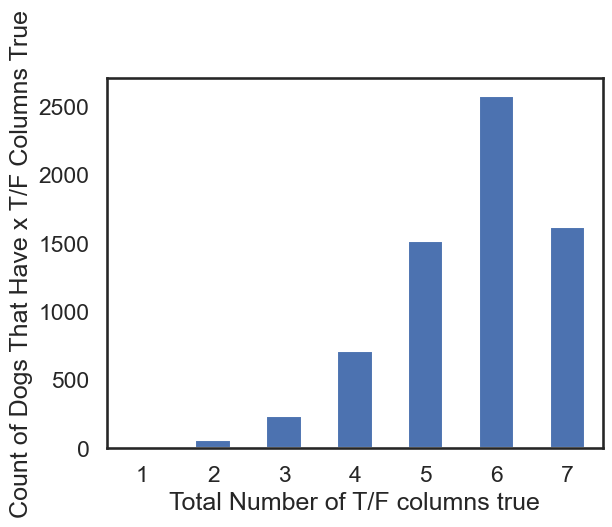

In [24]:
new_df.value_counts('sum').sort_index().plot.bar(xlabel='Total Number of T/F columns true',ylabel='Count of Dogs That Have x T/F Columns True',rot=0)

This second graph examines each T/F column individually, where blue indicates that the dog has this positive quality and orange indicates it does not.

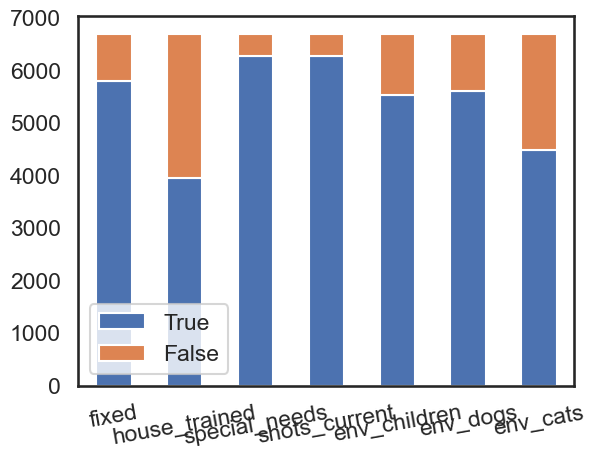

In [25]:
new_df2 = dogs[tf_cols].copy()
true_vals = [new_df2['fixed'].value_counts()[True], new_df2['house_trained'].value_counts()[True], new_df2['special_needs'].value_counts()[True],
            new_df2['shots_current'].value_counts()[True], new_df2['env_children'].value_counts()[True], new_df2['env_dogs'].value_counts()[True],
            new_df2['env_cats'].value_counts()[True]]
false_vals = [new_df2['fixed'].value_counts()[False], new_df2['house_trained'].value_counts()[False], new_df2['special_needs'].value_counts()[False],
            new_df2['shots_current'].value_counts()[False], new_df2['env_children'].value_counts()[False], new_df2['env_dogs'].value_counts()[False],
            new_df2['env_cats'].value_counts()[False]]
new_df3 = pd.DataFrame({'True': true_vals, 'False': false_vals}, index=tf_cols)
ax = new_df3.plot.bar(rot=10, stacked=True)

## Breeds/Colors

This graph shows the correlation between the amount of breeds brought into the shelter and their coat colors. 

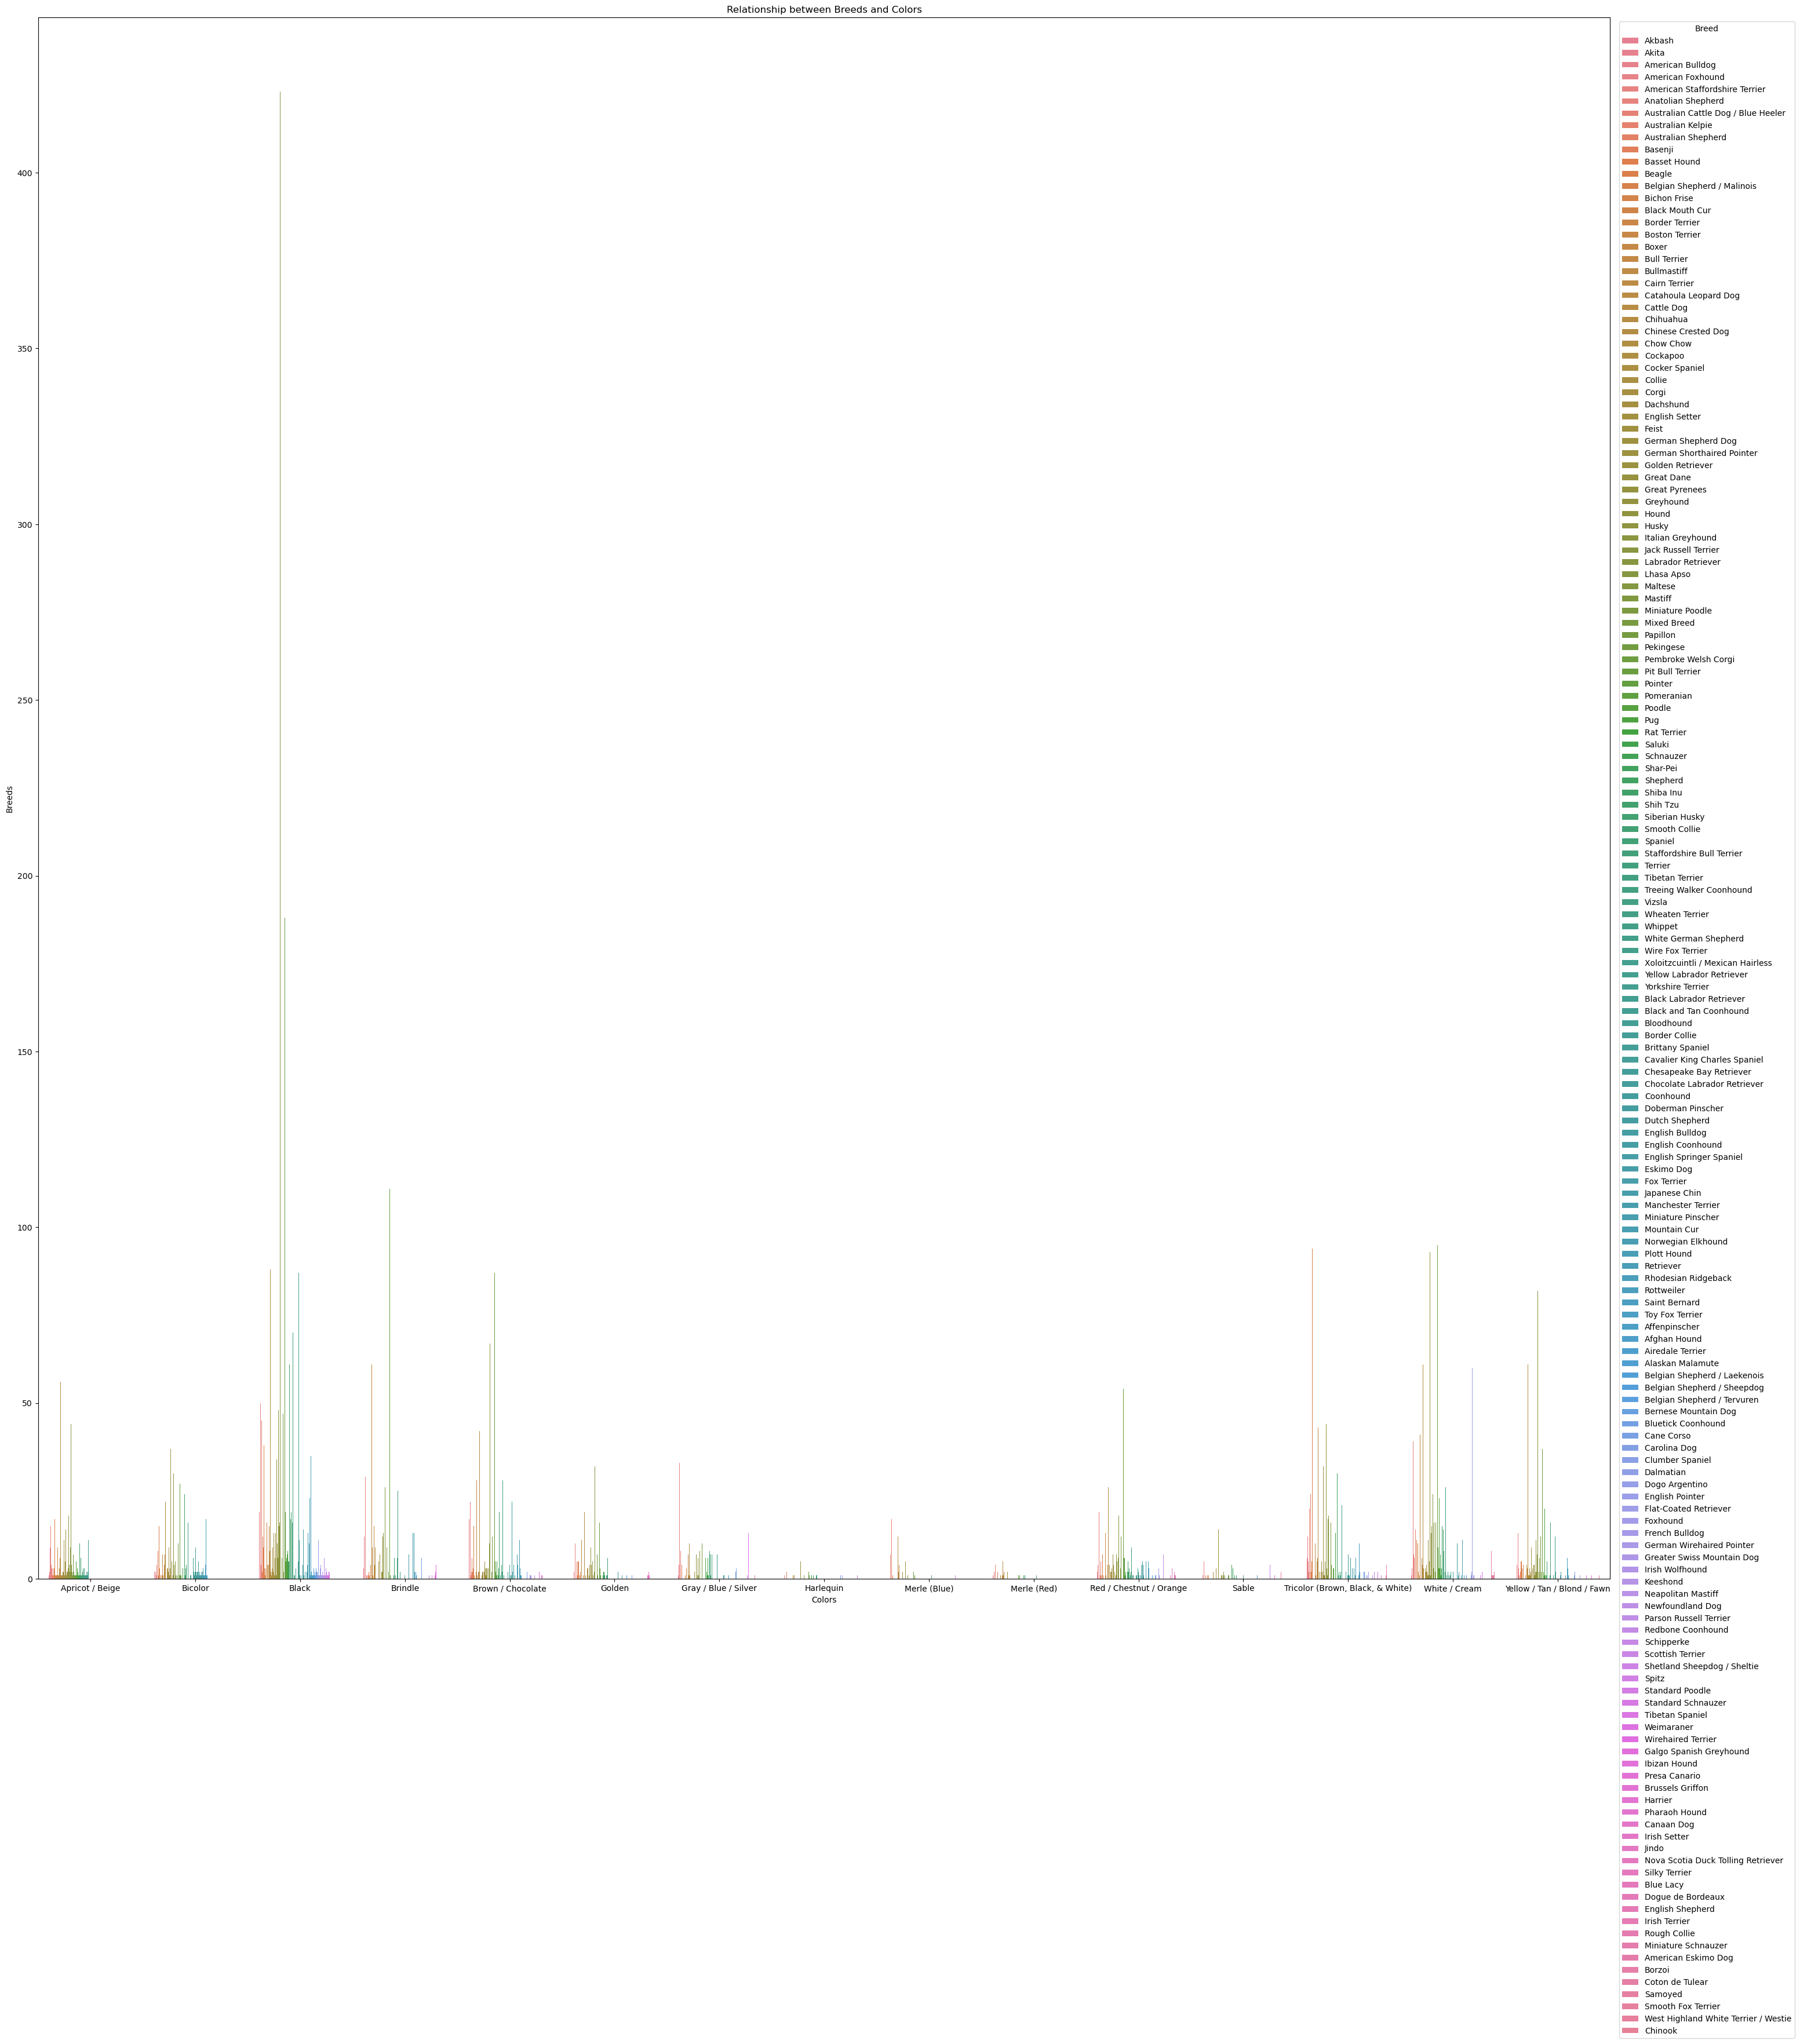

In [ ]:
dogs_data = dogs.groupby(['color_primary', 'breed_primary']).size().reset_index(name='count')

plt.figure(figsize=(35, 35))
sns.barplot(x = 'color_primary', y = 'count', hue = 'breed_primary', data = dogs_data)
plt.xlabel('Colors')
plt.ylabel('Breeds')
plt.title('Relationship between Breeds and Colors')
plt.legend(title='Breed', loc='upper right', bbox_to_anchor=(1.12, 1))
plt.show()

# Ethics & Privacy

There are no issues with privacy as all dogs taken from the data set were from petfinder.com, which is a reliable and ethical source for pet adoption as it collaborates with a vast network of animal shelters and rescue organizations. Their website also helps pet owners with the adoption process and other tips and guides for pet owners. The dataset itself does not include any human biases. However, there is the potential for the patterns expressed in it to have changed since this data is taken from a single day. We will consider these biases to make our conclusions more accurate for trends of that day and time period as opposed to generalizing over a broader time period. We will also detect biases by reviewing the data thoroughly before drawing any conclusions. There are no privacy concerns as the information is publicly available. Any additional issues identified will be handled uniquely depending on what the issue is, by consensus of the group.

# Team Expectations 

* Meeting once or twice a week(both virtually and in person). Reasonable wait time for a response would be same day or within a day. We communicate through Messages and Instagram as a backup.
* Set a positive environment for everyone to be able to express their opinions. Disagreements will be resolved politely and in a mature manner.
* Majority will be used, but everyone will always have their ideas heard before any decisions are made.
* We will do Middle Ground and assign each week based on meetings and keep each other accountable for the tasks that week.
* Communication between group members is key, try to say something before any major time passes. Always be understanding and help the person who may be having difficulties.

# Project Timeline Proposal

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 10/28  |  6 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 10/30  |  6 PM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 10/30  | 10 PM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 11/02  | 6 PM  | Import & Wrangle Data (Adoption); EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 11/14  | 6 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 11/25  | 6 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 12/11  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |